Enter the path to your CSV file:  


File not found. Creating sample data for demonstration.

First 5 rows of data:
  Country Name  2022 [YR2022]          IncomeGroup
0          USA      331002651          High income
1        China     1439323776          High income
2        India     1380004385          High income
3       Brazil      212559417  Upper middle income
4       Russia      145934462  Upper middle income

Basic stats:
count    1.000000e+01
mean     3.912706e+08
std      5.433149e+08
min      6.046183e+07
25%      7.186049e+07
50%      1.362055e+08
75%      3.013918e+08
max      1.439324e+09
Name: 2022 [YR2022], dtype: float64


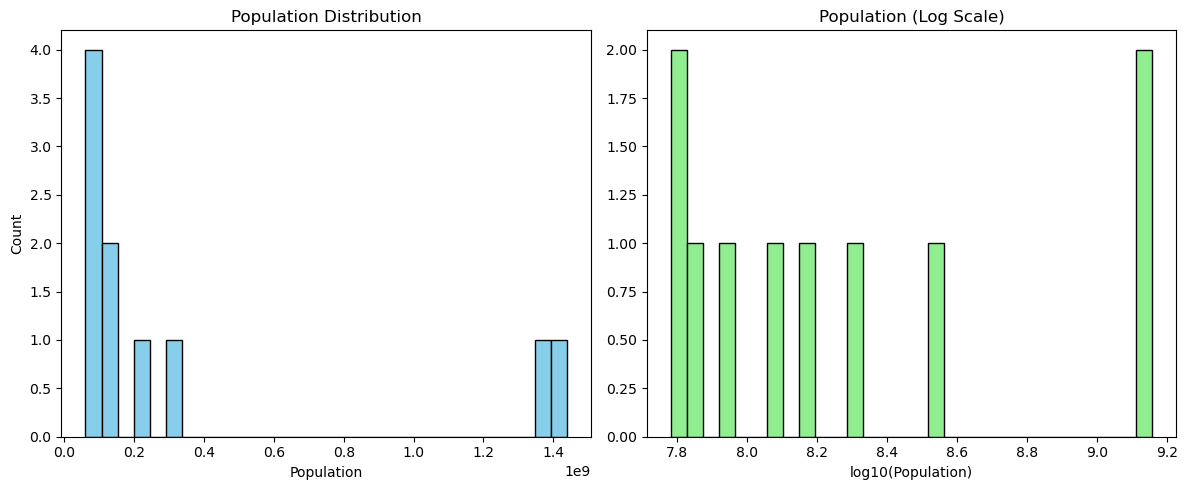

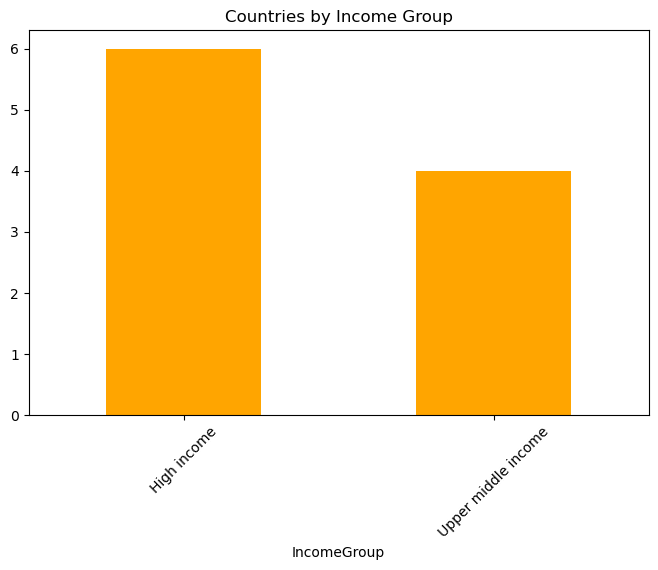

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
try:
    
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]  
    df = pd.read_csv(filename, skiprows=4)
except ImportError:
    try:
        
        file_path = input("Enter the path to your CSV file: ")
        df = pd.read_csv(file_path, skiprows=4)
    except FileNotFoundError:
       
        print("File not found. Creating sample data for demonstration.")
        import numpy as np
        countries = ['USA', 'China', 'India', 'Brazil', 'Russia', 'Japan', 'Germany', 'UK', 'France', 'Italy']
        populations = [331002651, 1439323776, 1380004385, 212559417, 145934462, 126476461, 83783942, 67886011, 65273511, 60461826]
        df = pd.DataFrame({
            'Country Name': countries,
            '2022 [YR2022]': populations,
            'IncomeGroup': ['High income']*3 + ['Upper middle income']*4 + ['High income']*3
        })

print("\nFirst 5 rows of data:")
print(df.head())


population_col = '2022 [YR2022]'  
pop_data = df[population_col].dropna()
print("\nBasic stats:")
print(pop_data.describe())


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.hist(pop_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(pop_data[pop_data > 0].apply(np.log10), bins=30, color='lightgreen', edgecolor='black')
plt.title('Population (Log Scale)')
plt.xlabel('log10(Population)')

plt.tight_layout()
plt.show()


if 'IncomeGroup' in df.columns:
    plt.figure(figsize=(8, 5))
    df['IncomeGroup'].value_counts().plot(kind='bar', color='orange')
    plt.title('Countries by Income Group')
    plt.xticks(rotation=45)
    plt.show()